In [1]:
# importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
dataset = pd.read_csv("EuropeanSales.csv")

In [3]:
dataset

,Country,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
0,Austria,8.4,49.60,4.2,5.8,112,941
1,Belgium,10.5,47.09,8.1,5.9,160,1682
2,Bulgaria,7.6,6.55,13.5,3.5,20,154
3,Czech Rep.,10.2,20.67,6.6,4.4,101,1029
4,Denmark,5.5,62.12,5.2,8.4,170,935
5,Finland,5.3,51.32,9.9,6.3,372,1971
6,France,61.9,44.51,10.0,5.7,96,5929
7,Germany,82.5,44.45,9.1,4.6,83,6824
8,Greece,11.2,31.67,9.9,3.9,73,813
9,Hungary,10.0,15.41,7.3,5.1,45,449


In [4]:
dataset.info()
#Checking null values but we have 0 nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            21 non-null     object 
 1   Population         21 non-null     float64
 2   GDPperHead         21 non-null     float64
 3   UnemploymentRate   21 non-null     float64
 4   EducationSpending  21 non-null     float64
 5   SalesPerCapita     21 non-null     int64  
 6   ComputerSales      21 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 1.3+ KB


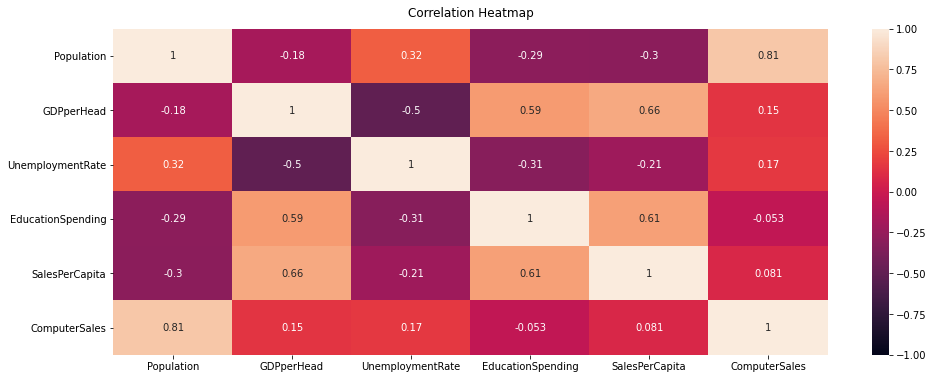

In [5]:
# correlation heat map
# For target SalesPerCapita only Computer Sales has bad correlation.
# The best one for SalesPerCapita is GDPperHead.
# For target ComputerSales EducationSpending and SalesPerCapita have bad correlation.
# The best one for ComputerSales is Population.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [6]:
# Our target value is SalesPerCapita
# We can see there are high correlation between salesPerCapita and GDPperHead,EducationSpendinge

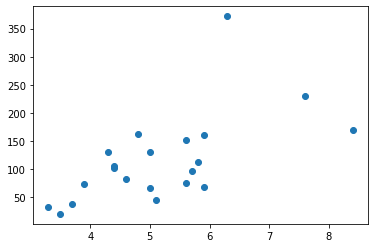

In [7]:
plt.scatter(dataset.loc[:,"EducationSpending"],dataset.loc[:,"SalesPerCapita"])

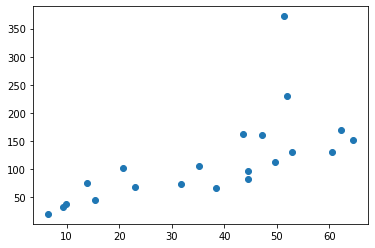

In [8]:
plt.scatter(dataset.loc[:,"GDPperHead"],dataset.loc[:,"SalesPerCapita"])

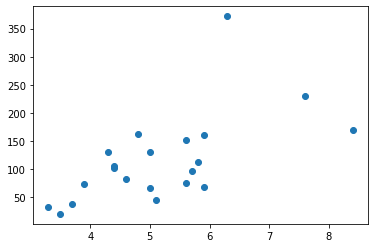

In [9]:
plt.scatter(dataset.loc[:,"EducationSpending"],dataset.loc[:,"SalesPerCapita"])

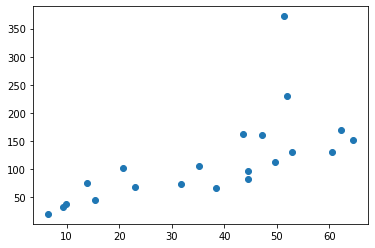

In [10]:
plt.scatter(dataset.loc[:,"GDPperHead"],dataset.loc[:,"SalesPerCapita"])

In [11]:
# we can see the linearization between each other.

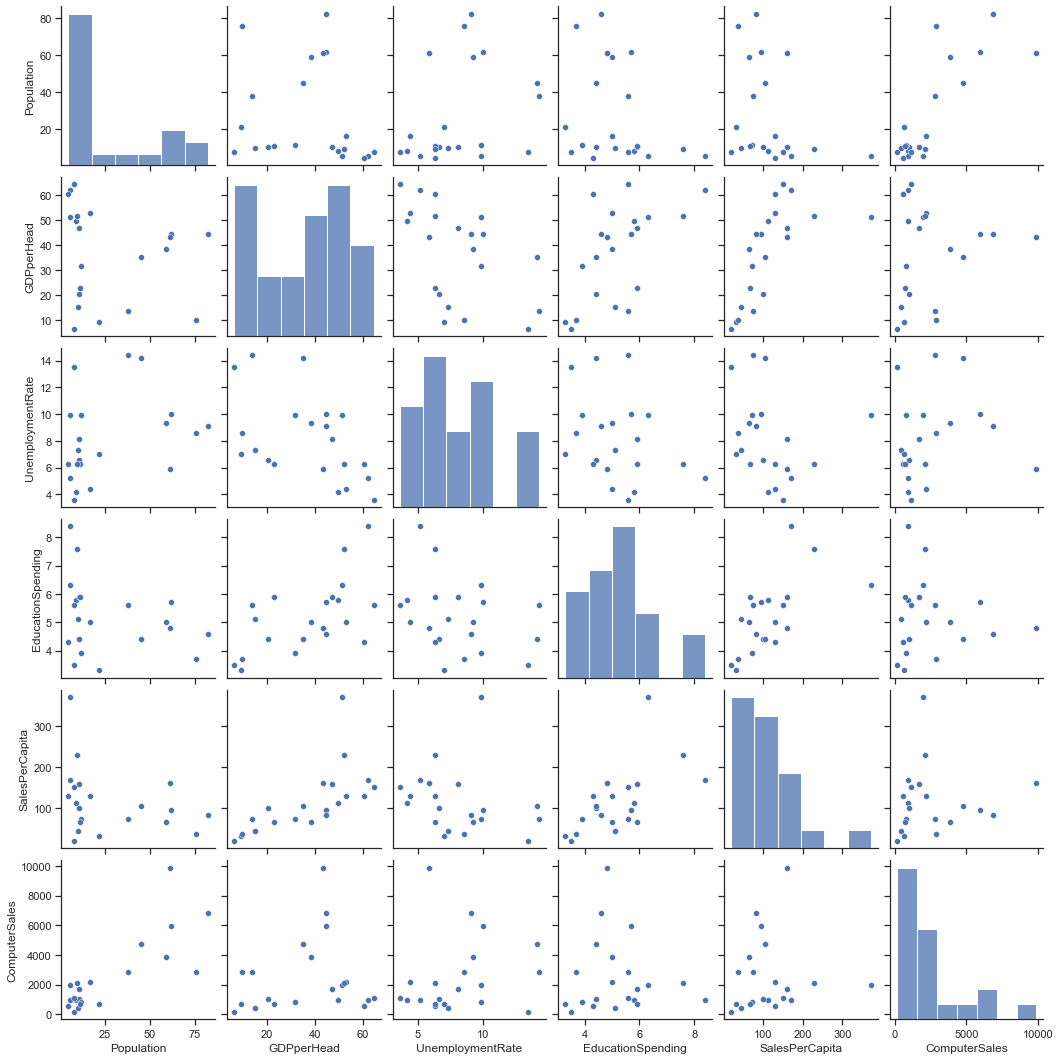

In [12]:
# Scatterplot Matrix
# we can see all distributions for our target values.
sns.set_theme(style="ticks")
sns.pairplot(dataset, hue=None)

In [13]:
# We can drop Country column because it is unnecessary.
dataset = dataset.drop(axis=1,columns="Country")

In [14]:
sorted(dataset)

['ComputerSales',
 'EducationSpending',
 'GDPperHead',
 'Population',
 'SalesPerCapita',
 'UnemploymentRate']

In [15]:
# removing outliers
# when we look the scatterplot matrix we can easily say that we have outliers in our data.
# Thats why we need to remove outliers in our data improve quality.
z_scores = stats.zscore(dataset)
z_score_abs = np.abs(z_scores)
filtered = (z_score_abs <3).all(axis = 1)
new_dataset = dataset[filtered]

In [16]:
# we can see 2 rows deleted.
new_dataset

,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
0,8.4,49.60,4.2,5.8,112,941
1,10.5,47.09,8.1,5.9,160,1682
2,7.6,6.55,13.5,3.5,20,154
3,10.2,20.67,6.6,4.4,101,1029
4,5.5,62.12,5.2,8.4,170,935
6,61.9,44.51,10.0,5.7,96,5929
7,82.5,44.45,9.1,4.6,83,6824
8,11.2,31.67,9.9,3.9,73,813
9,10.0,15.41,7.3,5.1,45,449
10,4.4,60.46,6.3,4.3,131,577


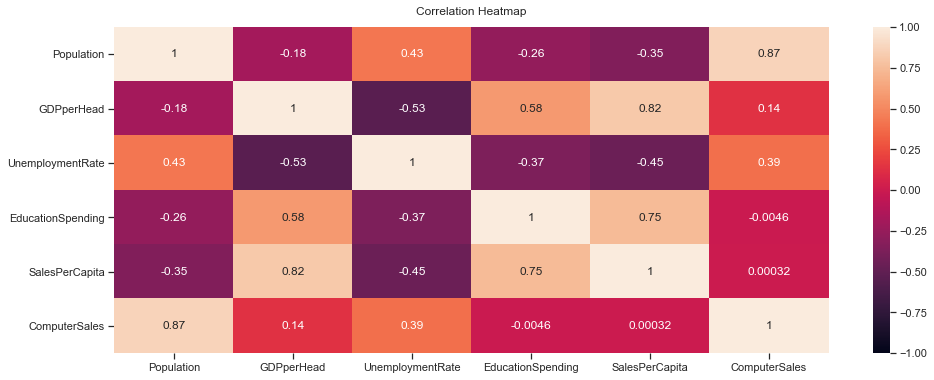

In [17]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(new_dataset.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [18]:
new_dataset.skew()

Population           1.193711
GDPperHead          -0.136667
UnemploymentRate     0.723390
EducationSpending    0.935730
SalesPerCapita       0.685150
ComputerSales        1.296713
dtype: float64

/Users/mustafaaliaykon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

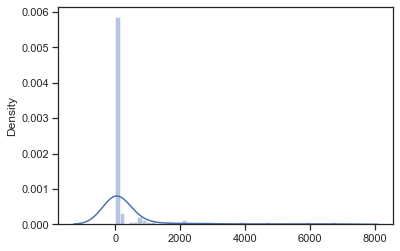

In [19]:
# when we check the our data histogram, it is not good as you can see.
# We need to do data transformation in our data. Let's try log transformation.
sns.distplot(new_dataset)

In [20]:
# log transformation
new_dataset = np.log(new_dataset)

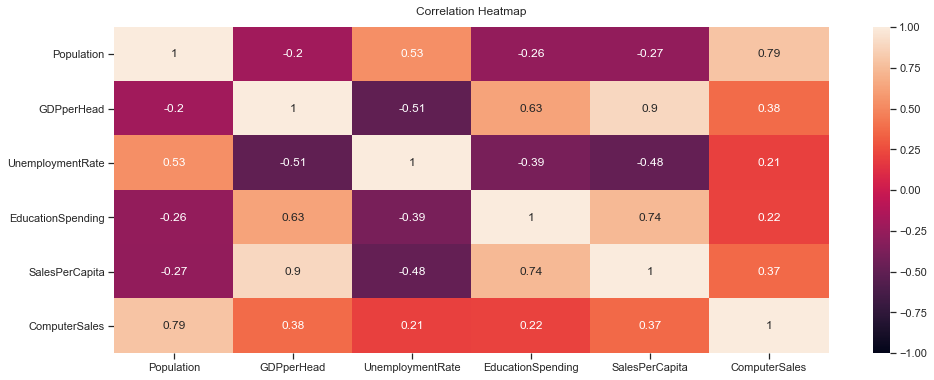

In [21]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotationto True to display the correlation values on the heatmap.
# we can see change of correlations.
heatmap = sns.heatmap(new_dataset.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

/Users/mustafaaliaykon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

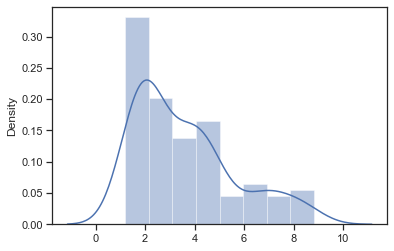

In [22]:
# our new histogram.
sns.distplot(new_dataset)

In [23]:
# I am putting features in X
X = new_dataset[["Population","GDPperHead","UnemploymentRate","EducationSpending","ComputerSales"]]

In [24]:
X

,Population,GDPperHead,UnemploymentRate,EducationSpending,ComputerSales
0,2.128232,3.903991,1.435085,1.757858,6.846943
1,2.351375,3.852061,2.091864,1.774952,7.427739
2,2.028148,1.879465,2.602690,1.252763,5.036953
3,2.322388,3.028683,1.887070,1.481605,6.936343
4,1.704748,4.129068,1.648659,2.128232,6.840547
6,4.125520,3.795714,2.302585,1.740466,8.687611
7,4.412798,3.794365,2.208274,1.526056,8.828201
8,2.415914,3.455370,2.292535,1.360977,6.700731
9,2.302585,2.735017,1.987874,1.629241,6.107023
10,1.481605,4.101982,1.840550,1.458615,6.357842


In [25]:
# My target feature is SalesPerCapita thats why i am putting in y.
y = new_dataset[["SalesPerCapita"]]

In [26]:
y

,SalesPerCapita
0,4.718499
1,5.075174
2,2.995732
3,4.615121
4,5.135798
6,4.564348
7,4.418841
8,4.290459
9,3.806662
10,4.875197


In [27]:
# training model. We are training the model with %70 train and %30 test.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [28]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(13, 5) (13, 1)
(6, 5) (6, 1)


In [29]:
# -----------------------------------fit a linear model
model = linear_model.LinearRegression()
model = model.fit(X_train,y_train)
test_predictions = model.predict(X_test)

In [30]:
# Mean Squared Error
# Mean Squared Error 
print("R^2 on Training set: ",model.score(X_train,y_train)) # train r2
print("R^2 on Test:", model.score(X_test, y_test)) # r^2
print(f'Adjusted R square : {(1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X.shape[1]-1))}')

R^2 on Training set:  0.9999744808816561
R^2 on Test: 0.9999370577897733
Adjusted R square : 0.9999562529399818


In [31]:
# Let's build model for ComputerSales.
X2 = new_dataset[["Population","GDPperHead","UnemploymentRate","SalesPerCapita"]]
y2 = new_dataset[["ComputerSales"]]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size = 0.3,random_state = 0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(13, 4) (13, 1)
(6, 4) (6, 1)


In [33]:
model2 = linear_model.LinearRegression()
model2 = model2.fit(X_train,y_train)
test_predictions2 = model2.predict(X_test)

In [34]:
print("R^2 on Training set: ",model2.score(X_train,y_train)) # train r2
print("R^2 on Test:", model2.score(X_test, y_test)) # r^2
print(f'Adjusted R square : {(1 - (1-model2.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X.shape[1]-1))}')

R^2 on Training set:  0.9999923772780844
R^2 on Test: 0.9999569078656846
Adjusted R square : 0.9999869324767162
